In [222]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score
from sklearn.metrics import median_absolute_error

ModuleNotFoundError: No module named 'sklearn.losses'

In [4]:
pd.set_option('display.max_columns', None)


In [77]:
df = pd.read_csv('C:\\Users\\Chris\\Documents\\all_seasons1.csv')


In [6]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,625000,1216931,36.0,46.0,0.439,21,97.2,99.5,-2.66
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,205200,399542,30.0,52.0,0.366,39,95.5,98.6,-2.56
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,1303000,2537058,24.0,58.0,0.293,40,90.6,97.0,-6.47
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,11695,Dwayne Bacon,ORL,25,198.12,100.243832,Florida State,USA,2017,2,40,72,10.9,3.1,1.3,-11.4,0.015,0.102,0.193,0.490,0.080,2020-21,1678854,1986964,21.0,51.0,0.292,28,104.0,113.3,-9.02
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28
10810,11697,Dwight Powell,DAL,29,208.28,108.862080,Stanford,Canada,2014,2,45,58,5.9,4.0,1.1,4.0,0.086,0.158,0.129,0.688,0.090,2020-21,11080125,13113596,42.0,30.0,0.583,10,112.4,110.2,2.26
10811,11698,Dylan Windler,CLE,24,198.12,88.904032,Belmont,USA,2019,1,26,31,5.2,3.5,1.1,-6.5,0.039,0.171,0.140,0.567,0.089,2020-21,2137440,2529712,22.0,50.0,0.306,27,103.8,112.3,-8.19


In [7]:
df_group = df.groupby('season')

In [8]:
df2 = df_group.mean()

C:\Users\Chris\AppData\Local\Temp\ipykernel_8244\1743381322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_group.mean()


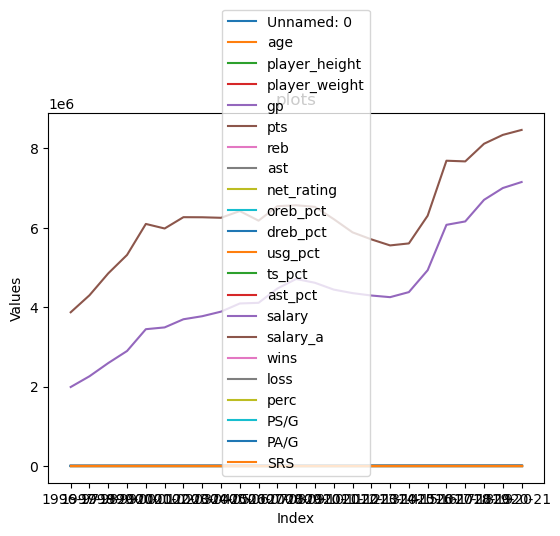

In [50]:
for column in df2.columns:
    plt.plot(df2.index, df2[column], label = column)
    
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('plots')
plt.legend()
plt.show()

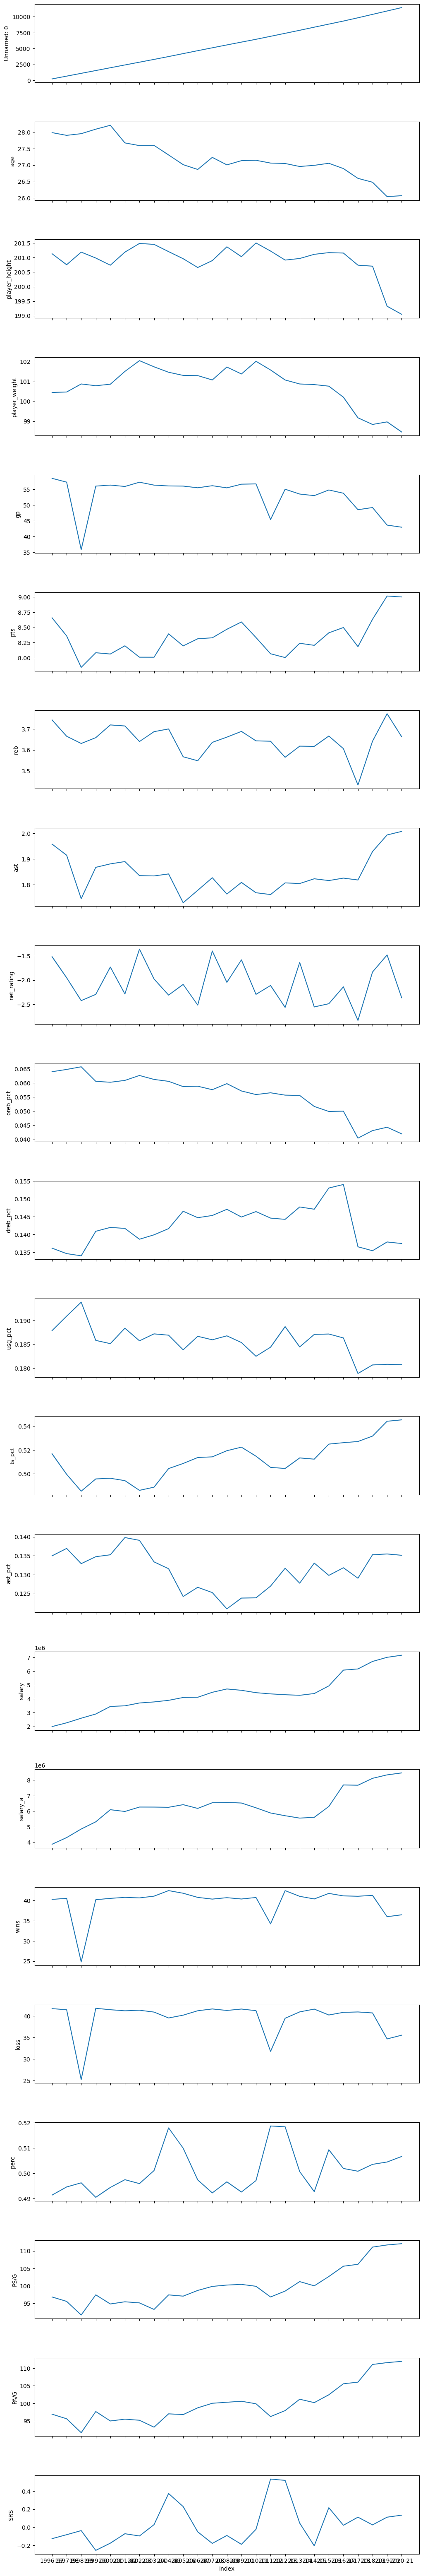

In [51]:
fig, axs = plt.subplots(nrows = len(df2.columns), figsize = (12,80), sharex = True)
for i, column in enumerate(df2.columns):
    axs[i].plot(df2.index, df2[column], label = column)
    axs[i].set_ylabel(column)
    
plt.xlabel('Index')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [78]:
df["season_number"] = df["season"].astype(str).str[:4]
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS,season_number
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70,1996
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,625000,1216931,36.0,46.0,0.439,21,97.2,99.5,-2.66,1996
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,205200,399542,30.0,52.0,0.366,39,95.5,98.6,-2.56,1996
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,1303000,2537058,24.0,58.0,0.293,40,90.6,97.0,-6.47,1996
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,11695,Dwayne Bacon,ORL,25,198.12,100.243832,Florida State,USA,2017,2,40,72,10.9,3.1,1.3,-11.4,0.015,0.102,0.193,0.490,0.080,2020-21,1678854,1986964,21.0,51.0,0.292,28,104.0,113.3,-9.02,2020
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28,2020
10810,11697,Dwight Powell,DAL,29,208.28,108.862080,Stanford,Canada,2014,2,45,58,5.9,4.0,1.1,4.0,0.086,0.158,0.129,0.688,0.090,2020-21,11080125,13113596,42.0,30.0,0.583,10,112.4,110.2,2.26,2020
10811,11698,Dylan Windler,CLE,24,198.12,88.904032,Belmont,USA,2019,1,26,31,5.2,3.5,1.1,-6.5,0.039,0.171,0.140,0.567,0.089,2020-21,2137440,2529712,22.0,50.0,0.306,27,103.8,112.3,-8.19,2020


In [79]:
df['season_number'] = df['season_number'].astype(int)

In [11]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS,season_number
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70,1996
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,625000,1216931,36.0,46.0,0.439,21,97.2,99.5,-2.66,1996
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,205200,399542,30.0,52.0,0.366,39,95.5,98.6,-2.56,1996
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,1303000,2537058,24.0,58.0,0.293,40,90.6,97.0,-6.47,1996
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,11695,Dwayne Bacon,ORL,25,198.12,100.243832,Florida State,USA,2017,2,40,72,10.9,3.1,1.3,-11.4,0.015,0.102,0.193,0.490,0.080,2020-21,1678854,1986964,21.0,51.0,0.292,28,104.0,113.3,-9.02,2020
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28,2020
10810,11697,Dwight Powell,DAL,29,208.28,108.862080,Stanford,Canada,2014,2,45,58,5.9,4.0,1.1,4.0,0.086,0.158,0.129,0.688,0.090,2020-21,11080125,13113596,42.0,30.0,0.583,10,112.4,110.2,2.26,2020
10811,11698,Dylan Windler,CLE,24,198.12,88.904032,Belmont,USA,2019,1,26,31,5.2,3.5,1.1,-6.5,0.039,0.171,0.140,0.567,0.089,2020-21,2137440,2529712,22.0,50.0,0.306,27,103.8,112.3,-8.19,2020


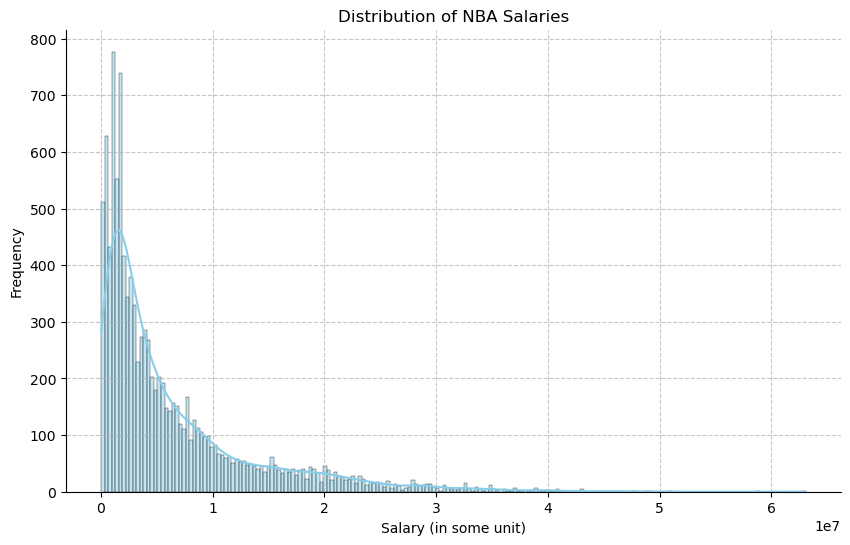

In [270]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['salary_a'], kde=True, bins=200, color='skyblue', ax=ax)
ax.set_xlabel('Salary (in some unit)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of NBA Salaries')
ax.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

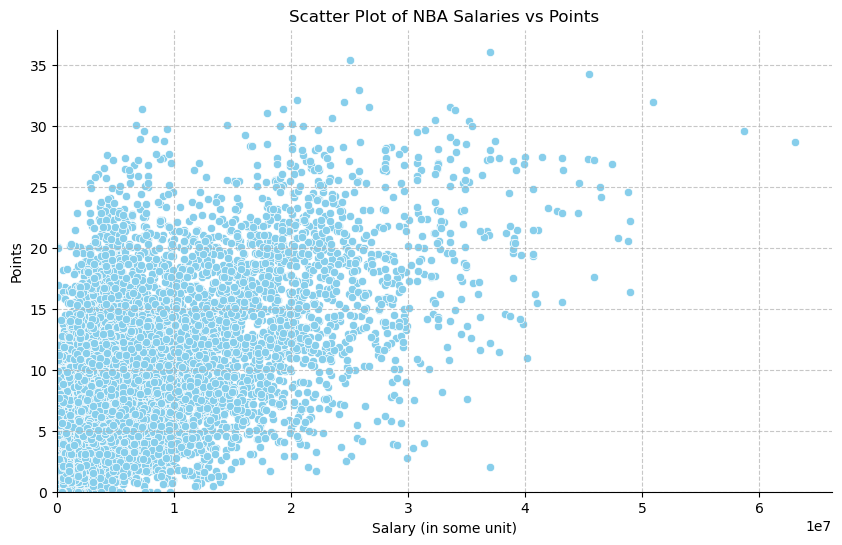

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['salary_a'], y=df['pts'], color='skyblue', ax=ax)
ax.set_xlabel('Salary (in some unit)')
ax.set_ylabel('Points')
ax.set_title('Scatter Plot of NBA Salaries vs Points')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim(left = 0)
ax.set_ylim(bottom=0)
sns.despine()
plt.show()

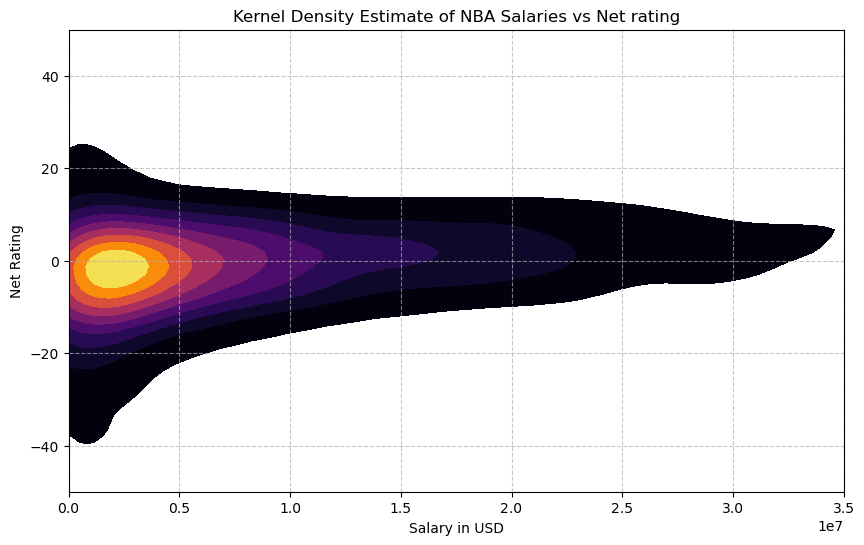

In [294]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(x=df['salary_a'], y=df['net_rating'], cmap='inferno', fill=True, ax=ax)
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Net Rating')
ax.set_title('Kernel Density Estimate of NBA Salaries vs Net rating')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim(0, 35000000)
ax.set_ylim(bottom=-50, top = 50)
plt.show()

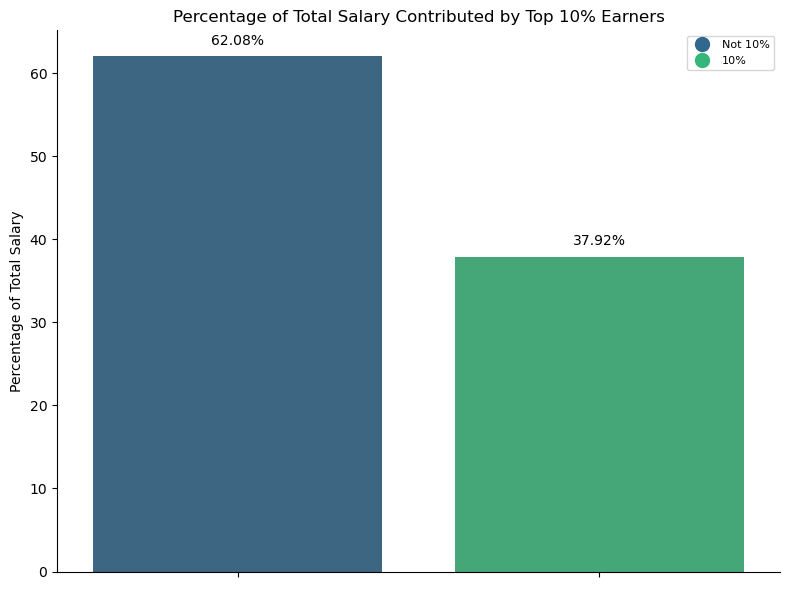

In [267]:
top_10_threshold = df['salary_a'].quantile(0.9)
df['top_10'] = df['salary_a'] >= top_10_threshold
percentage_top_10 = df.groupby('top_10')['salary_a'].sum() / df['salary_a'].sum() * 100
colors = sns.color_palette('viridis', len(percentage_top_10))
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=percentage_top_10.index, y=percentage_top_10.values, palette=colors, hue=percentage_top_10.index, dodge=False, ax=ax)
for idx, value in enumerate(percentage_top_10.values):
    ax.text(idx, value + 1, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
ax.set_xticks(range(len(percentage_top_10.index)))
ax.set_xticklabels(['', ''])
legend_labels = ['Not 10%', '10%']
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', markersize=10, linestyle='', label=label) for color, label in zip(colors, legend_labels)]
ax.legend(handles=legend_handles, loc='upper right', fontsize=8)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Total Salary')
ax.set_title('Percentage of Total Salary Contributed by Top 10% Earners')
sns.despine()
plt.tight_layout()

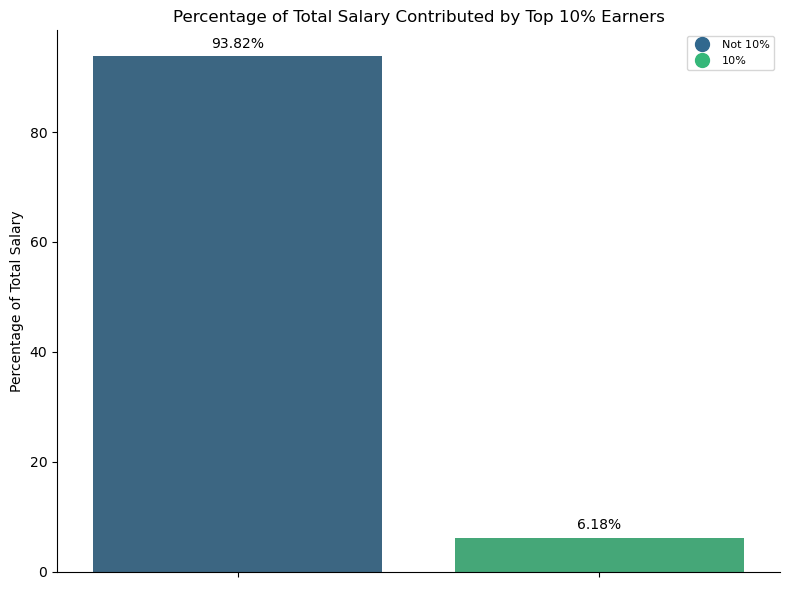

In [268]:
top_10_threshold = df['salary_a'].quantile(0.99)
df['top_10'] = df['salary_a'] >= top_10_threshold
percentage_top_10 = df.groupby('top_10')['salary_a'].sum() / df['salary_a'].sum() * 100
colors = sns.color_palette('viridis', len(percentage_top_10))
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=percentage_top_10.index, y=percentage_top_10.values, palette=colors, hue=percentage_top_10.index, dodge=False, ax=ax)
for idx, value in enumerate(percentage_top_10.values):
    ax.text(idx, value + 1, f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
ax.set_xticks(range(len(percentage_top_10.index)))
ax.set_xticklabels(['', ''])
legend_labels = ['Not 10%', '10%']
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', markersize=10, linestyle='', label=label) for color, label in zip(colors, legend_labels)]
ax.legend(handles=legend_handles, loc='upper right', fontsize=8)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Total Salary')
ax.set_title('Percentage of Total Salary Contributed by Top 1% Earners')
sns.despine()
plt.tight_layout()

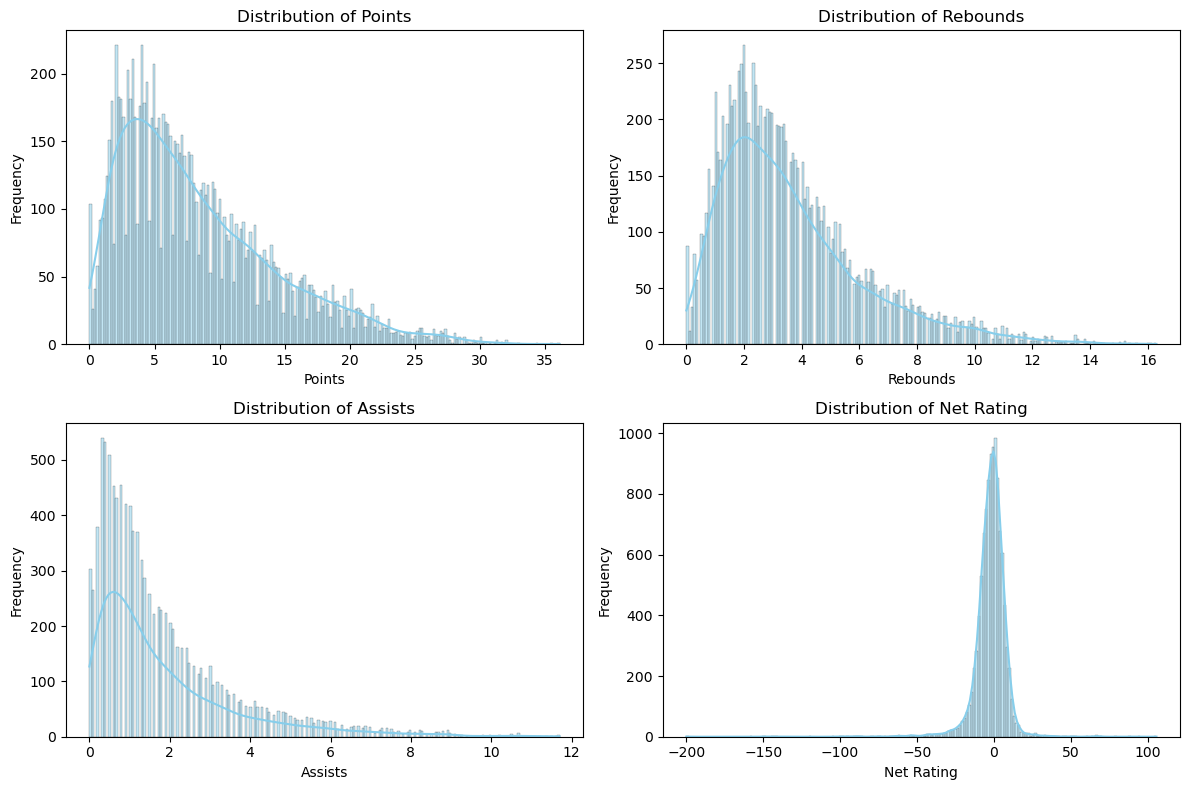

In [269]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['pts'], kde=True, bins=200, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Points')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Points')

sns.histplot(df['reb'], kde=True, bins=200, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_xlabel('Rebounds')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Rebounds')

sns.histplot(df['ast'], kde=True, bins=200, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_xlabel('Assists')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Assists')

sns.histplot(df['net_rating'], kde=True, bins=200, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_xlabel('Net Rating')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Net Rating')
plt.tight_layout()

plt.show()

# Lagged columns

In [37]:
cols_to_lag = ['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

In [38]:
lag_periods = [1, 2]

for lag_period in lag_periods:
    for column in cols_to_lag:
        lagged_column_name = f'{column}_lag{lag_period}'
        df[lagged_column_name] = df.groupby('player_name')[column].shift(lag_period)


In [39]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS,season_number,pts_lag1,reb_lag1,ast_lag1,net_rating_lag1,oreb_pct_lag1,dreb_pct_lag1,usg_pct_lag1,ts_pct_lag1,ast_pct_lag1,pts_lag2,reb_lag2,ast_lag2,net_rating_lag2,oreb_pct_lag2,dreb_pct_lag2,usg_pct_lag2,ts_pct_lag2,ast_pct_lag2
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,625000,1216931,36.0,46.0,0.439,21,97.2,99.5,-2.66,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,205200,399542,30.0,52.0,0.366,39,95.5,98.6,-2.56,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,1303000,2537058,24.0,58.0,0.293,40,90.6,97.0,-6.47,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,11695,Dwayne Bacon,ORL,25,198.12,100.243832,Florida State,USA,2017,2,40,72,10.9,3.1,1.3,-11.4,0.015,0.102,0.193,0.490,0.080,2020-21,1678854,1986964,21.0,51.0,0.292,28,104.0,113.3,-9.02,2020,5.7,2.6,1.3,-8.2,0.020,0.124,0.189,0.419,0.121,7.3,2.1,1.1,-2.0,0.010,0.105,0.167,0.570,0.092
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28,2020,7.5,7.3,0.7,5.9,0.128,0.257,0.146,0.696,0.048,12.8,9.2,0.4,-9.1,0.100,0.258,0.193,0.638,0.026
10810,11697,Dwight Powell,DAL,29,208.28,108.862080,Stanford,Canada,2014,2,45,58,5.9,4.0,1.1,4.0,0.086,0.158,0.129,0.688,0.090,2020-21,11080125,13113596,42.0,30.0,0.583,10,112.4,110.2,2.26,2020,9.4,5.7,1.5,8.9,0.071,0.132,0.126,0.677,0.076,10.6,5.3,1.5,0.9,0.081,0.160,0.167,0.682,0.101
10811,11698,Dylan Windler,CLE,24,198.12,88.904032,Belmont,USA,2019,1,26,31,5.2,3.5,1.1,-6.5,0.039,0.171,0.140,0.567,0.089,2020-21,2137440,2529712,22.0,50.0,0.306,27,103.8,112.3,-8.19,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
target_variables = ['pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'] 

##### dropping team variables

In [67]:
df_1 = df.drop(['wins', 'loss', 'perc', 'GB', 'PS/G', 'PA/G', 'SRS', 'season_number', 'salary', 'salary_a', 'net_rating', 'net_rating_lag1', 'net_rating_lag2'], axis = 1)


In [68]:
df_1 =df_1.drop(['Unnamed: 0'], axis = 1)

##### dropping the pct variables

In [69]:
#df_1 = df_1.drop(['oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'], axis = 1)

##### dropping strings

In [70]:
df_1 = df_1.drop(['player_name', 'team_abbreviation', 'college', 'season', 'draft_year'], axis = 1)

In [71]:
df_1['country'] = df_1['country'].apply(lambda x: 1 if x == 'USA' else 0)

In [72]:
df_1['draft_round'] = df_1['draft_round'].apply(lambda x: 4 if x == 'Undrafted' else x)

In [73]:
df_1['draft_number'] = df_1['draft_number'].apply(lambda x: 70 if x == 'Undrafted' else x)

In [74]:
df_1 

,age,player_height,player_weight,country,draft_round,draft_number,gp,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,pts_lag1,reb_lag1,ast_lag1,oreb_pct_lag1,dreb_pct_lag1,usg_pct_lag1,ts_pct_lag1,ast_pct_lag1,pts_lag2,reb_lag2,ast_lag2,oreb_pct_lag2,dreb_pct_lag2,usg_pct_lag2,ts_pct_lag2,ast_pct_lag2
0,36,198.12,99.790240,1,2,27,55,5.7,16.1,3.1,0.186,0.323,0.100,0.479,0.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28,215.90,117.933920,1,1,24,15,2.3,1.5,0.3,0.078,0.151,0.175,0.430,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39,205.74,95.254320,1,3,58,9,0.8,1.0,0.4,0.105,0.102,0.103,0.376,0.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,203.20,100.697424,1,1,9,64,3.7,2.3,0.6,0.060,0.149,0.167,0.399,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,205.74,108.862080,1,1,10,27,2.4,2.4,0.2,0.109,0.179,0.127,0.611,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,25,198.12,100.243832,1,2,40,72,10.9,3.1,1.3,0.015,0.102,0.193,0.490,0.080,5.7,2.6,1.3,0.020,0.124,0.189,0.419,0.121,7.3,2.1,1.1,0.010,0.105,0.167,0.570,0.092
10809,35,208.28,120.201880,1,1,1,69,7.0,8.4,0.9,0.148,0.309,0.173,0.610,0.076,7.5,7.3,0.7,0.128,0.257,0.146,0.696,0.048,12.8,9.2,0.4,0.100,0.258,0.193,0.638,0.026
10810,29,208.28,108.862080,0,2,45,58,5.9,4.0,1.1,0.086,0.158,0.129,0.688,0.090,9.4,5.7,1.5,0.071,0.132,0.126,0.677,0.076,10.6,5.3,1.5,0.081,0.160,0.167,0.682,0.101
10811,24,198.12,88.904032,1,1,26,31,5.2,3.5,1.1,0.039,0.171,0.140,0.567,0.089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_1 = df_1.dropna()

In [50]:
df_1

,age,player_height,player_weight,country,draft_round,draft_number,gp,pts,reb,ast,pts_lag1,reb_lag1,ast_lag1,oreb_pct_lag1,dreb_pct_lag1,usg_pct_lag1,ts_pct_lag1,ast_pct_lag1,pts_lag2,reb_lag2,ast_lag2,oreb_pct_lag2,dreb_pct_lag2,usg_pct_lag2,ts_pct_lag2,ast_pct_lag2
783,33,198.12,90.718400,1,1,24,1,0.0,1.0,1.0,6.3,3.6,4.4,0.026,0.130,0.164,0.397,0.273,7.2,2.5,4.1,0.029,0.095,0.184,0.478,0.297
784,27,205.74,115.212368,1,1,8,48,11.5,9.8,1.4,12.1,9.1,1.4,0.123,0.213,0.181,0.561,0.077,10.5,5.9,1.2,0.098,0.185,0.213,0.511,0.078
785,30,185.42,83.914520,1,2,32,40,7.3,2.0,2.8,5.6,1.5,2.7,0.034,0.060,0.156,0.575,0.229,5.0,1.2,2.6,0.032,0.052,0.170,0.551,0.249
787,27,198.12,88.450440,1,1,15,37,11.1,3.9,3.1,10.9,2.9,2.6,0.021,0.102,0.184,0.558,0.153,7.5,1.9,2.6,0.030,0.089,0.200,0.526,0.224
789,25,203.20,99.790240,1,1,27,16,2.1,1.2,0.9,4.5,1.9,0.8,0.061,0.124,0.185,0.476,0.105,1.4,0.6,0.5,0.017,0.121,0.168,0.455,0.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,22,193.04,90.718400,0,1,8,33,2.7,0.9,0.6,6.3,2.1,3.0,0.018,0.082,0.152,0.497,0.209,5.7,2.0,2.8,0.012,0.080,0.163,0.417,0.195
10808,25,198.12,100.243832,1,2,40,72,10.9,3.1,1.3,5.7,2.6,1.3,0.020,0.124,0.189,0.419,0.121,7.3,2.1,1.1,0.010,0.105,0.167,0.570,0.092
10809,35,208.28,120.201880,1,1,1,69,7.0,8.4,0.9,7.5,7.3,0.7,0.128,0.257,0.146,0.696,0.048,12.8,9.2,0.4,0.100,0.258,0.193,0.638,0.026
10810,29,208.28,108.862080,0,2,45,58,5.9,4.0,1.1,9.4,5.7,1.5,0.071,0.132,0.126,0.677,0.076,10.6,5.3,1.5,0.081,0.160,0.167,0.682,0.101


In [25]:
df_1['draft_number'].unique()

array(['24', '8', '32', '15', '27', '48', '13', '45', '6', '30', '11',
       '5', '2', 70, '43', '16', '3', '40', '21', '17', '25', '9', '14',
       '1', '7', '36', '26', '12', '56', '22', '4', '47', '29', '23',
       '18', '35', '19', '46', '34', '28', '50', '10', '44', '42', '160',
       '20', '37', '41', '31', '33', '52', '38', '58', '54', '49', '39',
       '53', '75', '51', '55', '57', '60'], dtype=object)

In [289]:
column_range = df_1['pts'].max()# - df_1['pts'].min()
column_range

36.1

In [56]:
prediction_lag = 1  
for column in target_variables:
    lagged_column_name = f'{column}_lag{prediction_lag}'
    df[lagged_column_name] = df.groupby('player_name')[column].shift(prediction_lag)

In [57]:
X = df_1.drop(columns=target_variables + [f'{col}_lag{prediction_lag}' for col in target_variables])
y = df_1[[f'{col}_lag{prediction_lag}' for col in target_variables]]

In [65]:
X = df_1.drop(columns=target_variables)
y = df_1[target_variables]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
param_dist = {
    'estimator__n_estimators': randint(50, 100),
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': randint(2, 7),
    'estimator__min_samples_leaf': randint(1, 2)
}

base_model = RandomForestRegressor(random_state=42)
model = MultiOutputRegressor(base_model)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    n_iter=1 
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Best Hyperparameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 61}


MultiOutputRegressor(estimator=RandomForestRegressor(min_samples_split=5,
                                                     n_estimators=61,
                                                     random_state=42))

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [173]:
y_pred_test = best_model.predict(X_test)
mse_per_column = mean_squared_error(y_test, y_pred_test, multioutput='raw_values')
for i, mse in enumerate(mse_per_column):
    column_name = target_variables[i]
    print(f"Mean Squared Error for {column_name}: {mse}")

Mean Squared Error for pts: 7.217279628606902
Mean Squared Error for reb: 1.4593868471173084
Mean Squared Error for ast: 0.5897549402713329
Mean Squared Error for oreb_pct: 0.000376391810698423
Mean Squared Error for dreb_pct: 0.001056479076863352
Mean Squared Error for usg_pct: 0.0007590602054711275
Mean Squared Error for ts_pct: 0.00454791575380658
Mean Squared Error for ast_pct: 0.0020768542775174074


In [151]:
lagged_columns = [f'{column}_lag{lag_period}' for lag_period in lag_periods for column in target_variables]
non_lagged_columns = ['age', 'player_height', 'player_weight', 'country', 'draft_round', 'draft_number', 'gp']
include_columns = lagged_columns + non_lagged_columns
lag_periods = [1, 2]

for lag_period in lag_periods:
    for column in cols_to_lag:
        lagged_column_name = f'{column}_lag{lag_period}'
        df[lagged_column_name] = df.groupby('player_name')[column].shift(lag_period)

df_1 = df.drop(['wins', 'loss', 'perc', 'GB', 'PS/G', 'PA/G', 'SRS', 'season_number', 'salary', 'salary_a', 'net_rating', 'net_rating_lag1', 'net_rating_lag2'], axis=1)
df_1 = df_1.drop(['Unnamed: 0'], axis=1)
df_1 = df_1.drop(['player_name', 'team_abbreviation', 'college', 'season', 'draft_year'], axis=1)
df_1['country'] = df_1['country'].apply(lambda x: 1 if x == 'USA' else 0)
df_1['draft_round'] = df_1['draft_round'].apply(lambda x: 4 if x == 'Undrafted' else x)
df_1['draft_number'] = df_1['draft_number'].apply(lambda x: 70 if x == 'Undrafted' else x)
df_1 = df_1.dropna()
#print(df_1.iloc[5583])
base_model_1 = RandomForestRegressor(n_estimators=100, random_state=42)  
model_1 = MultiOutputRegressor(base_model_1)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

for iteration in range(2): 
    X_test_shifted = pd.DataFrame(X_test.copy(), columns=X_test.columns)
    for lag_period in lag_periods:
        for idx, column in enumerate(target_variables):
            lagged_column_name = f'{column}_lag{lag_period}'
            X_test_shifted[lagged_column_name] = y_pred[:, idx]
            X_test_shifted[lagged_column_name] = X_test_shifted[lagged_column_name].shift(lag_period)
    for column in non_lagged_columns:
        X_test_shifted[column] = X_test[column]
        
    X_test_shifted = X_test_shifted[X_train.columns]

    print(X_test_shifted)
    X_test_shifted = X_test_shifted.fillna(X_test_shifted.mean()) 
    y_pred = model.predict(X_test_shifted)
    print(y_pred)


      age  player_height  player_weight  country draft_round draft_number  gp  \
5584   22         213.36     129.273720        1           1           10  65   
8248   27         213.36     120.201880        1           2           33  73   
9417   31         190.50      86.182480        1           1            7  69   
9727   25         205.74     104.326160        1           1           30  43   
5817   31         203.20     111.130040        1           4           70  30   
...   ...            ...            ...      ...         ...          ...  ..   
6167   29         205.74      99.336648        1           1           19  35   
5195   23         187.96      90.718400        1           2           42  75   
8404   29         198.12     104.779752        1           2           34  64   
8958   23         190.50      83.914520        1           1           14  25   
9806   25         205.74      97.522280        1           2           47  71   

      pts_lag1  reb_lag1  a

C:\Users\Chris\AppData\Local\Temp\ipykernel_8244\910684509.py:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test_shifted = X_test_shifted.fillna(X_test_shifted.mean())
C:\Users\Chris\AppData\Local\Temp\ipykernel_8244\910684509.py:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test_shifted = X_test_shifted.fillna(X_test_shifted.mean())


In [143]:
new_inputs = {
    'age': 28.7,
    'player_height': 201.05,
    'player_weight': 101.4,
    'country': 1,
    'draft_round': 1,
    'draft_number': 10,
    'gp': 56,
    'pts_lag1': 9.9,
    'reb_lag1': 4.2,
    'ast_lag1': 2.1,
    'oreb_pct_lag1': 0.055,
    'dreb_pct_lag1': 0.14,
    'usg_pct_lag1': .13,
    'ts_pct_lag1': 0.52,
    'ast_pct_lag1': 0.14,
    'pts_lag2': 9,
    'reb_lag2': 4,
    'ast_lag2': 2.1,
    'oreb_pct_lag2': 0.08,
    'dreb_pct_lag2': 0.12,
    'usg_pct_lag2': 22,
    'ts_pct_lag2': 0.58,
    'ast_pct_lag2': 0.13
}

In [149]:
new_inputs_df = pd.DataFrame([new_inputs])
print(new_inputs_df)
input_columns = X.columns

new_inputs_df = new_inputs_df[input_columns]

predictions = model_1.predict(new_inputs_df)

print("Predicted Values:")
for idx, column in enumerate(target_variables):
    print(f"{column}: {predictions[0, idx]}")

    age  player_height  player_weight  country  draft_round  draft_number  gp  \
0  28.7         201.05          101.4        1            1            10  56   

   pts_lag1  reb_lag1  ast_lag1  oreb_pct_lag1  dreb_pct_lag1  usg_pct_lag1  \
0       9.9       4.2       2.1          0.055           0.14          0.13   

   ts_pct_lag1  ast_pct_lag1  pts_lag2  reb_lag2  ast_lag2  oreb_pct_lag2  \
0         0.52          0.14         9         4       2.1           0.08   

   dreb_pct_lag2  usg_pct_lag2  ts_pct_lag2  ast_pct_lag2  
0           0.12            22         0.58          0.13  
Predicted Values:
pts: 8.716000000000001
reb: 4.255000000000002
ast: 1.7100000000000002
oreb_pct: 0.05516999999999998
dreb_pct: 0.13605000000000012
usg_pct: 0.15218000000000004
ts_pct: 0.5254500000000001
ast_pct: 0.12323


In [158]:
input_df = pd.DataFrame([new_inputs])
predicted_values = model_1.predict(input_df)
second_iteration_inputs = {
    'age': new_inputs['age'],
    'player_height': new_inputs['player_height'],
    'player_weight': new_inputs['player_weight'],
    'country': new_inputs['country'],
    'draft_round': new_inputs['draft_round'],
    'draft_number': new_inputs['draft_number'],
    'gp': new_inputs['gp'],
}

for lag_period in lag_periods:
    for idx, column in enumerate(target_variables):
        lagged_column_name = f'{column}_lag{lag_period}'
        if lag_period == 1:
            lagged_column_name = f'{column}_lag1'
        second_iteration_inputs[lagged_column_name] = predicted_values[0][idx]
second_iteration_inputs_df = pd.DataFrame([second_iteration_inputs])
second_iteration_predicted_values = model_1.predict(second_iteration_inputs_df)
print("First Iteration Predicted Values:", predicted_values)
print("Second Iteration Predicted Values:", second_iteration_predicted_values)

First Iteration Predicted Values: [[8.716   4.255   1.71    0.05517 0.13605 0.15218 0.52545 0.12323]]
Second Iteration Predicted Values: [[7.569   3.966   1.455   0.05055 0.13671 0.15147 0.51433 0.10719]]


In [160]:
first_iteration_results = pd.DataFrame(data=predicted_values, columns=target_variables)
first_iteration_results

,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,8.716,4.255,1.71,0.05517,0.13605,0.15218,0.52545,0.12323


In [165]:
second_iteration_results = pd.DataFrame(data=second_iteration_predicted_values, columns=target_variables)
second_iteration_results

,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,7.569,3.966,1.455,0.05055,0.13671,0.15147,0.51433,0.10719


In [174]:
base_model_1 = RandomForestRegressor(n_estimators=100, random_state=42)  
model_1 = MultiOutputRegressor(base_model_1)
cv_scores = cross_val_score(model_1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
mse_per_target = [mean_squared_error(y_test[col], y_pred[:, idx]) for idx, col in enumerate(target_variables)]
for idx, col in enumerate(target_variables):
    print(f'Mean Squared Error for {col}: {mse_per_target[idx]}')
print('Cross-Validation Scores:')
print(cv_scores)
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')


KeyboardInterrupt



In [175]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS,season_number,pts_lag1,reb_lag1,ast_lag1,net_rating_lag1,oreb_pct_lag1,dreb_pct_lag1,usg_pct_lag1,ts_pct_lag1,ast_pct_lag1,pts_lag2,reb_lag2,ast_lag2,net_rating_lag2,oreb_pct_lag2,dreb_pct_lag2,usg_pct_lag2,ts_pct_lag2,ast_pct_lag2
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,24,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,625000,1216931,36.0,46.0,0.439,21,97.2,99.5,-2.66,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,58,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,205200,399542,30.0,52.0,0.366,39,95.5,98.6,-2.56,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,9,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,1303000,2537058,24.0,58.0,0.293,40,90.6,97.0,-6.47,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,11695,Dwayne Bacon,ORL,25,198.12,100.243832,Florida State,USA,2017,2,40,72,10.9,3.1,1.3,-11.4,0.015,0.102,0.193,0.490,0.080,2020-21,1678854,1986964,21.0,51.0,0.292,28,104.0,113.3,-9.02,2020,5.7,2.6,1.3,-8.2,0.020,0.124,0.189,0.419,0.121,7.3,2.1,1.1,-2.0,0.010,0.105,0.167,0.570,0.092
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28,2020,7.5,7.3,0.7,5.9,0.128,0.257,0.146,0.696,0.048,12.8,9.2,0.4,-9.1,0.100,0.258,0.193,0.638,0.026
10810,11697,Dwight Powell,DAL,29,208.28,108.862080,Stanford,Canada,2014,2,45,58,5.9,4.0,1.1,4.0,0.086,0.158,0.129,0.688,0.090,2020-21,11080125,13113596,42.0,30.0,0.583,10,112.4,110.2,2.26,2020,9.4,5.7,1.5,8.9,0.071,0.132,0.126,0.677,0.076,10.6,5.3,1.5,0.9,0.081,0.160,0.167,0.682,0.101
10811,11698,Dylan Windler,CLE,24,198.12,88.904032,Belmont,USA,2019,1,26,31,5.2,3.5,1.1,-6.5,0.039,0.171,0.140,0.567,0.089,2020-21,2137440,2529712,22.0,50.0,0.306,27,103.8,112.3,-8.19,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df_2 = df[df['perc'] > 0.66]

In [182]:
df_2

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,salary,salary_a,wins,loss,perc,GB,PS/G,PA/G,SRS,season_number,pts_lag1,reb_lag1,ast_lag1,net_rating_lag1,oreb_pct_lag1,dreb_pct_lag1,usg_pct_lag1,ts_pct_lag1,ast_pct_lag1,pts_lag2,reb_lag2,ast_lag2,net_rating_lag2,oreb_pct_lag2,dreb_pct_lag2,usg_pct_lag2,ts_pct_lag2,ast_pct_lag2
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,9000000,17523809,69.0,13.0,0.841,—,103.1,92.3,10.70,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,10,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,300000,584126,61.0,21.0,0.744,—,94.8,89.3,5.56,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Eddie Johnson,HOU,38,200.66,97.522280,Illinois,USA,1981,2,29,52,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97,1200000,2336507,57.0,25.0,0.695,7,100.6,96.1,3.85,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Eddie Jones,LAL,25,198.12,86.182480,Temple,USA,1994,1,10,80,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97,1800000,3504761,56.0,26.0,0.683,1,100.0,95.7,3.66,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Elden Campbell,LAL,28,213.36,113.398000,Clemson,USA,1990,1,27,77,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97,7000000,13629629,56.0,26.0,0.683,1,100.0,95.7,3.66,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,11675,Frank Kaminsky,PHX,28,213.36,108.862080,Wisconsin,USA,2015,1,9,47,6.6,4.0,1.7,4.6,0.051,0.208,0.185,0.547,0.154,2020-21,1737145,2055953,51.0,21.0,0.708,1,115.3,109.5,5.67,2020,9.7,4.5,1.9,-1.0,0.043,0.179,0.204,0.545,0.144,8.6,3.5,1.3,0.9,0.048,0.164,0.216,0.587,0.129
10796,11683,Elijah Hughes,UTA,23,195.58,97.522280,Syracuse,USA,2020,2,39,18,1.7,0.5,0.3,-28.8,0.014,0.119,0.242,0.488,0.158,2020-21,898310,1063171,52.0,20.0,0.722,—,116.4,107.2,8.97,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10799,11686,Ersan Ilyasova,UTA,34,205.74,106.594120,None,Turkey,2005,2,36,17,3.8,1.7,0.2,6.7,0.047,0.143,0.190,0.578,0.040,2020-21,1194542,1413769,52.0,20.0,0.722,—,116.4,107.2,8.97,2020,6.6,4.8,0.8,4.2,0.059,0.212,0.158,0.589,0.065,6.8,4.5,0.8,9.7,0.071,0.151,0.151,0.548,0.056
10809,11696,Dwight Howard,PHI,35,208.28,120.201880,None,USA,2004,1,1,69,7.0,8.4,0.9,-2.4,0.148,0.309,0.173,0.610,0.076,2020-21,2564753,3035447,49.0,23.0,0.681,—,113.6,108.1,5.28,2020,7.5,7.3,0.7,5.9,0.128,0.257,0.146,0.696,0.048,12.8,9.2,0.4,-9.1,0.100,0.258,0.193,0.638,0.026


In [186]:
df_2 = df_2.drop(['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_number', 'draft_year', 'draft_round', 'gp', 'net_rating', 'net_rating_lag2', 'net_rating_lag2', 'season', 'salary', 'wins', 'loss', 'GB', 'PS/G', 'SRS', 'season_number',  'pts_lag1', 'ast_lag1', 'ast_lag1', 'net_rating_lag1',  'oreb_pct_lag1', 'dreb_pct_lag1', 'usg_pct_lag1', 'ts_pct_lag1',  'ast_pct_lag1', 'pts_lag2', 'reb_lag2', 'ast_lag2','net_rating_lag2', 'oreb_pct_lag2', 'dreb_pct_lag2', 'usg_pct_lag2', 'ts_pct_lag2', 'ast_pct_lag2'], axis=1)


In [189]:
df_2 = df_2.drop(['Unnamed: 0', 'perc', 'PA/G', 'reb_lag1'], axis = 1)

In [190]:
df_2

,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,salary_a
0,5.7,16.1,3.1,0.186,0.323,0.100,0.479,0.113,17523809
4,2.4,2.4,0.2,0.109,0.179,0.127,0.611,0.040,584126
5,8.2,2.7,1.0,0.034,0.126,0.220,0.541,0.102,2336507
6,17.2,4.1,3.4,0.035,0.091,0.209,0.559,0.149,3504761
7,14.9,8.0,1.6,0.095,0.183,0.222,0.520,0.087,13629629
...,...,...,...,...,...,...,...,...,...
10788,6.6,4.0,1.7,0.051,0.208,0.185,0.547,0.154,2055953
10796,1.7,0.5,0.3,0.014,0.119,0.242,0.488,0.158,1063171
10799,3.8,1.7,0.2,0.047,0.143,0.190,0.578,0.040,1413769
10809,7.0,8.4,0.9,0.148,0.309,0.173,0.610,0.076,3035447


In [193]:
X1 = df_2.drop(['salary_a'], axis = 1 )
y1 = df_2['salary_a']

In [200]:
X1

,pts,reb,ast,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,5.7,16.1,3.1,0.186,0.323,0.100,0.479,0.113
4,2.4,2.4,0.2,0.109,0.179,0.127,0.611,0.040
5,8.2,2.7,1.0,0.034,0.126,0.220,0.541,0.102
6,17.2,4.1,3.4,0.035,0.091,0.209,0.559,0.149
7,14.9,8.0,1.6,0.095,0.183,0.222,0.520,0.087
...,...,...,...,...,...,...,...,...
10788,6.6,4.0,1.7,0.051,0.208,0.185,0.547,0.154
10796,1.7,0.5,0.3,0.014,0.119,0.242,0.488,0.158
10799,3.8,1.7,0.2,0.047,0.143,0.190,0.578,0.040
10809,7.0,8.4,0.9,0.148,0.309,0.173,0.610,0.076


In [201]:
y1

0        17523809
4          584126
5         2336507
6         3504761
7        13629629
           ...   
10788     2055953
10796     1063171
10799     1413769
10809     3035447
10812     2759496
Name: salary_a, Length: 1643, dtype: int64

In [194]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [196]:
model_g = LinearRegression()
model_g.fit(X_train1, y_train1)

y_train_pred = model_g.predict(X_train1)
y_test_pred = model_g.predict(X_test1)

In [202]:
y_train_pred

array([22892840.14730714,  3089461.41068532,   769976.21850914, ...,
        6561312.02256889,  2302259.84957782,  2719173.40150725])

In [205]:
y_train1

5530    28002070
8319    12988175
6799      444488
7467     8493252
4848    19401137
          ...   
7281     5553280
8267      799302
5809     1618289
9628      553843
7246     2732057
Name: salary_a, Length: 1314, dtype: int64

In [206]:
mse_train = mean_squared_error(y_train1, y_train_pred)
print("Mean Squared Error on Training Set:", mse_train)

Mean Squared Error on Training Set: 35791115609914.414


In [210]:
mse_test = mean_squared_error(y_test1, y_test_pred)
print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Test Set: 36116765399812.914


In [213]:
(sum(abs(y_train1 - y_train_pred)))/len(y_train1)

3987900.6797796

In [217]:
model_svm = SVR()
model_svm.fit(X_train1, y_train1)
y_train_pred_svm = model_svm.predict(X_train1)
y_test_pred_svm = model_svm.predict(X_test1)

In [231]:
y_train_pred_svm = model_svm.predict(X_train1)

y_test_pred_svm = model_svm.predict(X_test1)

mse_train_svm = mean_squared_error(y_train1, y_train_pred_svm)
print("Mean Squared Error (MSE) - Support Vector Machine (Training Set):", mse_train_svm)

mse_test_svm = mean_squared_error(y_test1, y_test_pred_svm)

Mean Squared Error (MSE) - Support Vector Machine (Training Set): 87720762169499.25


In [239]:
medae_train1 = median_absolute_error(y_train1, y_train_pred_svm)
medae_test1 = median_absolute_error(y_test1, y_test_pred_svm)

In [240]:
medae_train1

2813509.331980185

In [241]:
medae_test1 

2927456.9522963543

In [219]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train1, y_train1)
y_train_pred_dt = model_dt.predict(X_train1)
y_test_pred_dt = model_dt.predict(X_test1)

In [220]:
y_train_pred_dt = model_dt.predict(X_train1)
y_test_pred_dt = model_dt.predict(X_test1)
mse_train_dt = mean_squared_error(y_train1, y_train_pred_dt)
print("Mean Squared Error (MSE) - Decision Tree (Training Set):", mse_train_dt)

mse_test_dt = mean_squared_error(y_test1, y_test_pred_dt)
print("Mean Squared Error (MSE) - Decision Tree (Test Set):", mse_test_dt)

Mean Squared Error (MSE) - Decision Tree (Training Set): 0.0
Mean Squared Error (MSE) - Decision Tree (Test Set): 77987418370645.34


In [234]:
medae_train = median_absolute_error(y_train1, y_train_pred_dt)
medae_test = median_absolute_error(y_test1, y_test_pred_dt)
medae_train

0.0

In [235]:
medae_test

3325805.0

In [236]:
medae_train = median_absolute_error(y_train1, y_train_pred)
medae_test = median_absolute_error(y_test1, y_test_pred)

In [237]:
medae_train

2659189.278021952

In [238]:
medae_test

2662071.5342619317

In [242]:
df_3 = df[df['perc'] < 0.66]

In [243]:
df_3 = df_3.drop(['Unnamed: 0', 'perc', 'PA/G', 'reb_lag1'], axis = 1)
df_3 = df_3.drop(['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_number', 'draft_year', 'draft_round', 'gp', 'net_rating', 'net_rating_lag2', 'net_rating_lag2', 'season', 'salary', 'wins', 'loss', 'GB', 'PS/G', 'SRS', 'season_number',  'pts_lag1', 'ast_lag1', 'ast_lag1', 'net_rating_lag1',  'oreb_pct_lag1', 'dreb_pct_lag1', 'usg_pct_lag1', 'ts_pct_lag1',  'ast_pct_lag1', 'pts_lag2', 'reb_lag2', 'ast_lag2','net_rating_lag2', 'oreb_pct_lag2', 'dreb_pct_lag2', 'usg_pct_lag2', 'ts_pct_lag2', 'ast_pct_lag2'], axis=1)

In [244]:
X2 = df_3.drop(['salary_a'], axis = 1 )
y2 = df_3['salary_a']

In [245]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [246]:
model_g1 = LinearRegression()
model_g1.fit(X_train2, y_train2)

y_train_pred1 = model_g1.predict(X_train2)
y_test_pred1 = model_g1.predict(X_test2)


In [248]:
medae_trainb = median_absolute_error(y_train2, y_train_pred1)
medae_testb = median_absolute_error(y_test2, y_test_pred1)

In [249]:
print(medae_trainb)
print(medae_testb)

2602749.68556278
2610617.560810187
